In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [3]:
# Генерация выборки из логистического распределения
N = 10000
l = 3
s = 2
sample = np.random.logistic(l, s, N)


In [4]:
# Метод моментов
l_moment = np.mean(sample)

def estimate_l(sample):
    return np.mean(sample)


In [5]:
# Метод максимального правдоподобия
def likelihood_function(l, sample):
    return np.prod(stats.logistic.pdf(sample, loc=l, scale=s))

l_ml = stats.logistic.fit(sample)[0]


In [6]:
# Оценка дисперсии, смещения и рассеяния оценки параметра
num_samples = 100
samples = [np.random.logistic(l, s, N) for _ in range(num_samples)]

estimates = [estimate_l(sample) for sample in samples]

variance = np.var(estimates)
bias = np.mean(estimates) - l
mse = variance + bias**2


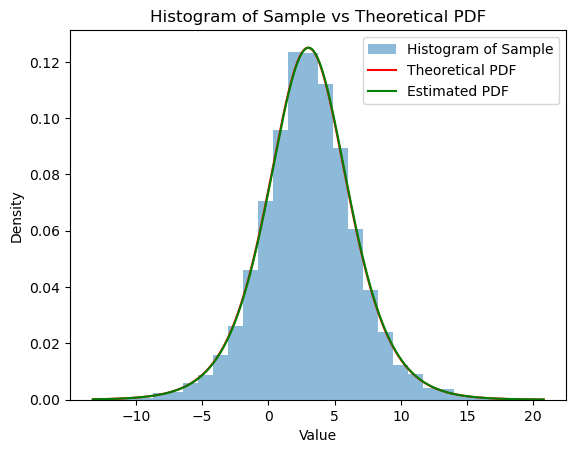

In [7]:
# Расчет гистограммы относительных частот
plt.hist(sample, bins=30, density=True, alpha=0.5, label='Histogram of Sample')

x = np.linspace(min(sample), max(sample), 1000)
plt.plot(x, stats.logistic.pdf(x, loc=l, scale=s), 'r', label='Theoretical PDF')

plt.plot(x, stats.logistic.pdf(x, loc=l_ml, scale=s), 'g', label='Estimated PDF')
plt.legend()
plt.title('Histogram of Sample vs Theoretical PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


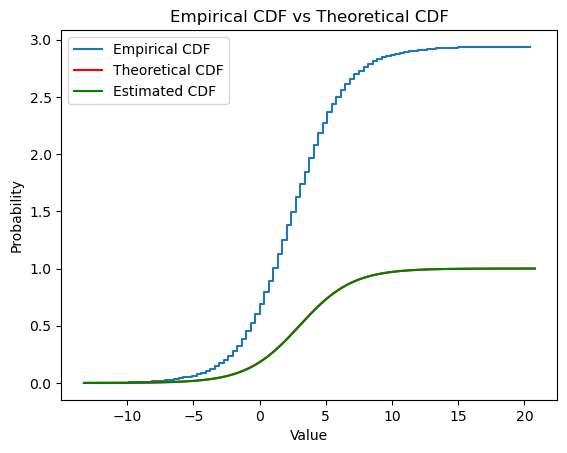

In [8]:
# Расчет эмпирической функции распределения
ecdf = np.cumsum(np.histogram(sample, bins=100, density=True)[0])
plt.step(np.histogram(sample, bins=100, density=True)[1][:-1], ecdf, label='Empirical CDF')

x = np.linspace(min(sample), max(sample), 1000)
plt.plot(x, stats.logistic.cdf(x, loc=l, scale=s), 'r', label='Theoretical CDF')

plt.plot(x, stats.logistic.cdf(x, loc=l_ml, scale=s), 'g', label='Estimated CDF')
plt.legend()
plt.title('Empirical CDF vs Theoretical CDF')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()
